## Question 1

In [123]:
import numpy as np
from matplotlib import pyplot as plt 
from PIL import Image
path = 'coins.png'
coin = Image.open(path)
coin = np.asarray(coin)

In [124]:
coin

array([[192,  30,  50, ...,  57,  57,  57],
       [192,  30,  50, ...,  57,  57,  57],
       [192,  30,  50, ...,  57,  57,  57],
       ...,
       [194,  54,  69, ...,  71,  72,  72],
       [194,  54,  69, ...,  71,  72,  72],
       [194,  54,  69, ...,  71,  72,  72]], dtype=uint8)

In [125]:
newcoin = coin.flatten()

In [126]:
newcoin

array([192,  30,  50, ...,  71,  72,  72], dtype=uint8)

In [127]:
def histogram(grayscaleimage):
    frequency = np.array(256*[0])

    for i in range(grayscaleimage.size):
        frequency[[grayscaleimage[i]]] +=1 
    return frequency
histogram(newcoin)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    1,    0,    0,    0,    0,    3,
          3,    1,    2,    4,    5,    3,    4,    3,   20,   11,    5,
         18,   20,   26,   10,   16,   11,   17,   27,   22,   24,   24,
         29,   45,   58,   49,   67,  240,  438,  218,  673,  476,  613,
        604,  562,  965, 1271, 1327,  588, 1127, 1286,  858,  989, 1004,
       1259,  901,  959,  678, 1289, 2056, 3480, 2511, 3285, 2178,  751,
        142,  120,   75,   63,   68,   42,   50,   27,   25,   23,   11,
         24,   28,   15,   27,   27,   20,   16,   16,   26,   21,   17,
         16,   26,   24,   25,   23,   33,   36,   36,   28,   25,   43,
         28,   42,   32,   37,   36,   37,   34,   44,   28,   31,   34,
         42,   31,   50,   39,   38,   38,   44,   47,   42,   34,   43,
         44,   42,   49,   45,   48,   53,   51,   58,   47,   60,   46,
         44,   46,   71,   59,   75,   71,   71,   

In [128]:
def average_intensity(grayscaleimage):
    return np.sum(np.arange(256)*histogram(grayscaleimage))/np.sum(histogram(grayscaleimage))

average_intensity(newcoin)

103.30500158906722

In [129]:
def actual_average_intensity(grayscaleimage):
    return np.sum(grayscaleimage)/len(grayscaleimage)
actual_average_intensity(newcoin)

103.30500158906722

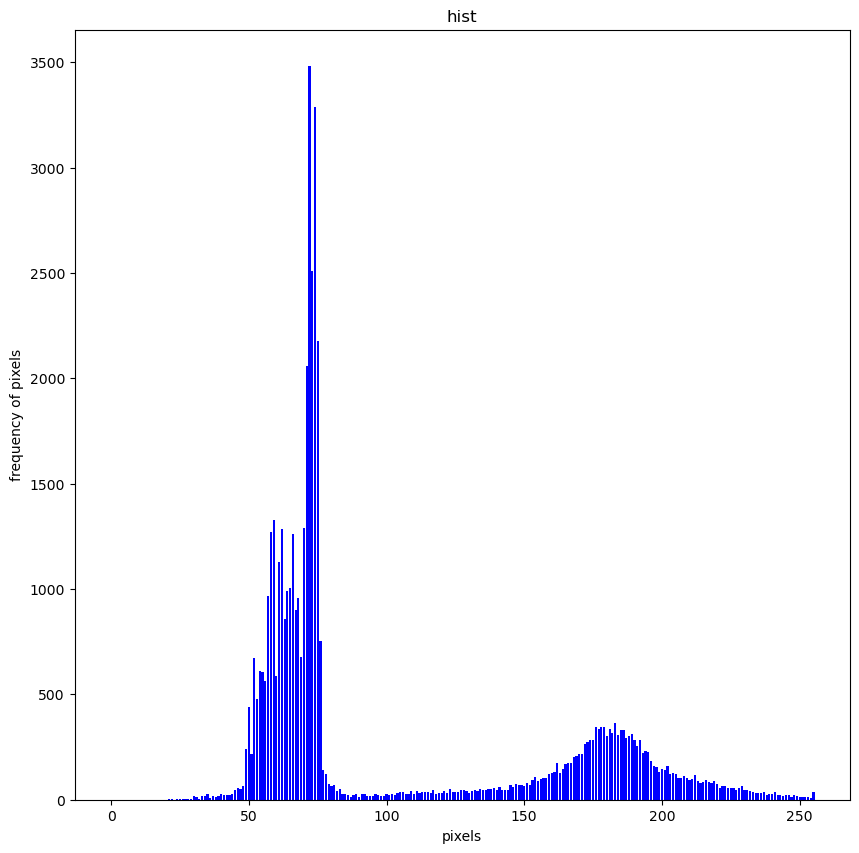

In [130]:
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(newcoin) , color = 'blue');


## QUESTION 2

##### Within class variance

In [131]:
def within_class_variance(grayscaleimage,threshold):
    
    freq = histogram(grayscaleimage)
    
    
    
    p = freq/len(grayscaleimage)
    best_thr = 0
    min_within = 99999999999
    for j in range(threshold):
        #class 0 prob
        c0p =np.sum(p[:j+1])
        c1p = np.sum(p[j+1:])
        if c0p !=0 and c1p !=0:
            #class 0 mean
            c0m = np.sum(np.arange(0,j+1)*p[:j+1])/c0p
            c1m = np.sum(np.arange(j+1,256)*p[j+1:])/c1p
            #variance class 0 
            c0v = np.sum(((np.arange(0,j+1) - c0m)**2 * p[:j+1])/c0p)
            c1v = np.sum(((np.arange(j+1,256) - c1m)**2 * p[j+1:])/c1p)
            # within class variance
            within_class_variance = c0p*c0v + c1p*c1v
            initial_within_variance[j] = within_class_variance
        
            if within_class_variance < min_within:
            
                min_within = within_class_variance
                best_thr = j

    return best_thr

initial_within_variance = np.ones(256)
within_class_variance(newcoin, threshold = 255)

125

##### Between class variance


In [132]:
def between_class_variance(grayscaleimage, threshold):
    
    new_freq = histogram(grayscaleimage)
    p = new_freq/len(grayscaleimage)
    best_thr = 0
    max_within = 0
    for j in range(threshold):
        #class prob
        c0p =np.sum(p[:j+1])
        c1p = np.sum(p[j+1:])
        if c0p !=0 and c1p !=0:
            #class mean
            c0m = np.sum(np.arange(0,j+1)*p[:j+1])/c0p
            c1m = np.sum(np.arange(j+1,256)*p[j+1:])/c1p
            #between class variance class  
            between_class_variance = (c0p * c1p) * ((c0m-c1m)**2)
            # between class 
        
            new_between_class_variance[j] = between_class_variance
        
            if between_class_variance > max_within:
            
                max_within = between_class_variance
                best_thr = j
    return best_thr
new_between_class_variance = np.ones(256)
between_class_variance(newcoin, 256)

125

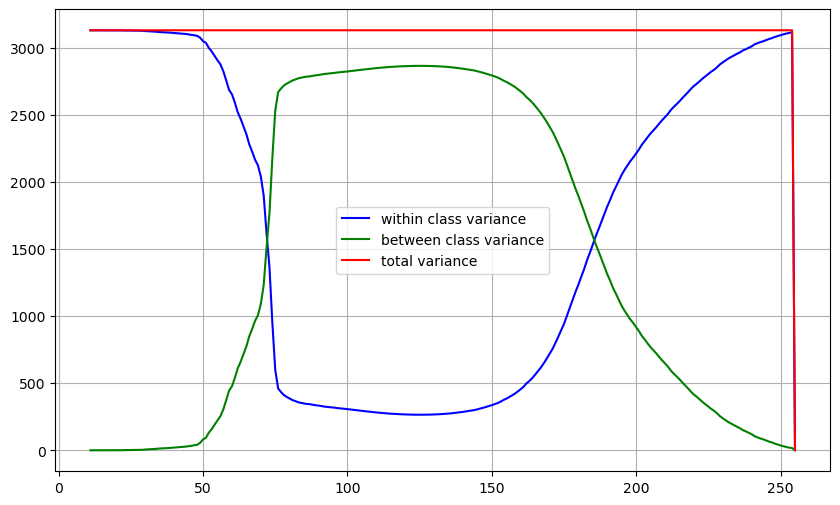

In [134]:
x = np.arange(256)
y1 = initial_within_variance
y2 = new_between_class_variance

y3 = initial_within_variance +  new_between_class_variance # total variance = within class variance + between class variance 
plt.figure(figsize=(10,6))

plt.plot(x[11:], y1[11:], label = "within class variance" ,color='b')  # Blue line for y1
plt.plot(x[11:], y2[11:], label = "between class variance",color='g')  # Green line for y2
plt.plot(x[11:], y3[11:], label = "total variance", color='r')  # Red line for y3
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# threshold is 125
new_arr = np.zeros(coin.shape)
new_arr[coin <= 125] = 0
new_arr[coin > 125] = 255
new_arr

array([[255.,   0.,   0., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.]])

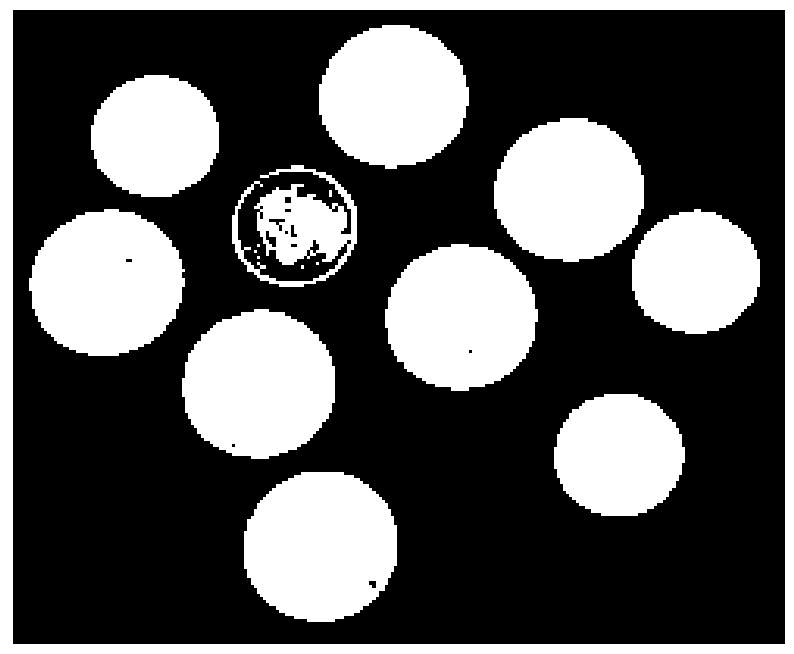

In [80]:
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(new_arr, cmap="gray");

## Question 3

In [12]:
import skimage
sudoku = np.array(skimage.io.imread('/Users/bhaskar/sudoku.png'))
sudoku

array([[170, 165, 166, ..., 206, 206, 206],
       [169, 165, 167, ..., 206, 206, 206],
       [168, 164, 165, ..., 207, 207, 207],
       ...,
       [ 47,  46,  46, ..., 133, 133, 133],
       [ 48,  48,  47, ..., 133, 134, 134],
       [ 47,  47,  46, ..., 132, 134, 135]], dtype=uint8)

In [13]:
new_sudoku = sudoku.flatten()
new_sudoku


array([170, 165, 166, ..., 132, 134, 135], dtype=uint8)

In [36]:
#def new_histogram(grayscaleimage):
    #pq = np.array(256*[0])

    #for i in range(len(new_sudoku)):
        #pq[[new_sudoku[i]]] +=1
    #return pq

#new_histogram(new_sudoku)
histogram(new_sudoku)

array([   0,    0,    0,    0,    0,    0,    0,    0,    1,    1,    7,
         30,   37,  101,  229,  274,  226,  179,  210,  233,  257,  343,
        491,  548,  604,  497,  483,  602,  599,  543,  517,  444,  456,
        456,  517,  586,  607,  623,  598,  593,  545,  609,  570,  619,
        661,  730,  761,  840,  906,  911,  882,  877,  933, 1058, 1144,
       1243, 1128, 1152, 1246, 1326, 1448, 1409, 1391, 1452, 1553, 1426,
       1449, 1509, 1440, 1558, 1498, 1742, 1739, 1721, 1744, 1911, 1909,
       1864, 2044, 1876, 1924, 1825, 2047, 2013, 1918, 2093, 2420, 2473,
       2471, 2554, 2624, 2761, 2841, 2652, 2394, 2360, 2517, 2766, 2865,
       2855, 3073, 3138, 3395, 3405, 3379, 3451, 3453, 3222, 3095, 2985,
       3020, 3029, 3103, 2894, 2776, 2560, 2463, 2451, 2398, 2506, 2351,
       2422, 2562, 2676, 2761, 2800, 3004, 3001, 3092, 2938, 2839, 2699,
       2796, 2833, 2901, 2790, 2768, 2705, 2859, 2916, 2979, 3223, 3280,
       3057, 2735, 2347, 2159, 1860, 1798, 1606, 14



##### question 3 part A

In [116]:
thre = within_class_variance(new_sudoku, 256)
print(thre)

97


In [83]:
thre = between_class_variance(new_sudoku, 256)
print(thre)

97


In [84]:
# threshold is 97
new_arr_sudoku = np.zeros(sudoku.shape)
#new_arr_sudoku
new_arr_sudoku[sudoku <= thre] = 0
new_arr_sudoku[sudoku > thre] = 255
new_arr_sudoku

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.]])

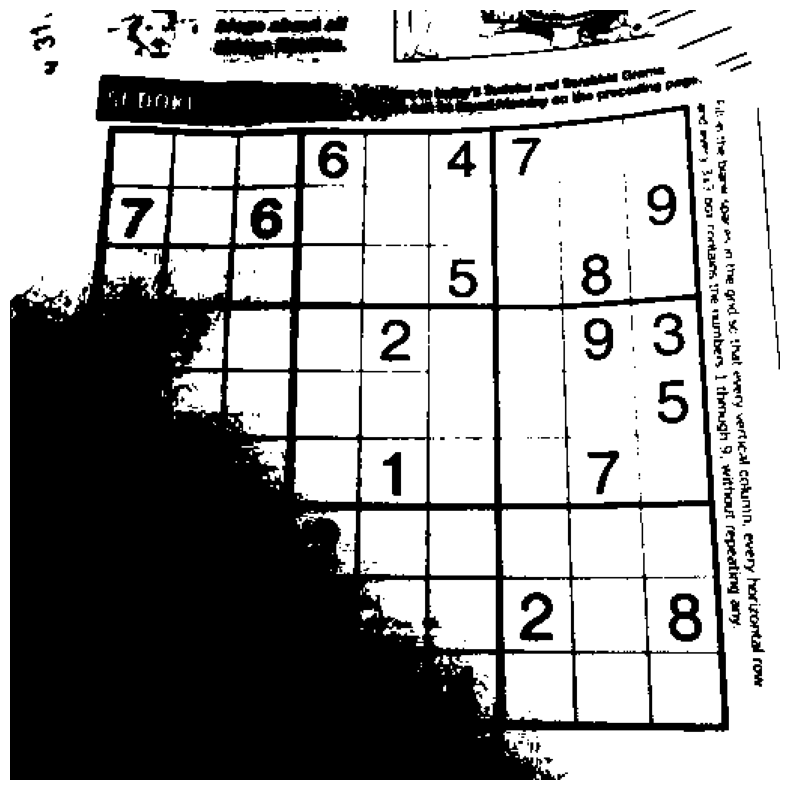

In [85]:
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(new_arr_sudoku, cmap="gray");

#### Question 3 part B

In [86]:
sudoku

array([[170, 165, 166, ..., 206, 206, 206],
       [169, 165, 167, ..., 206, 206, 206],
       [168, 164, 165, ..., 207, 207, 207],
       ...,
       [ 47,  46,  46, ..., 133, 133, 133],
       [ 48,  48,  47, ..., 133, 134, 134],
       [ 47,  47,  46, ..., 132, 134, 135]], dtype=uint8)

In [87]:
new_sudoku

array([170, 165, 166, ..., 132, 134, 135], dtype=uint8)

In [88]:
histogram(new_sudoku)

array([   0,    0,    0,    0,    0,    0,    0,    0,    1,    1,    7,
         30,   37,  101,  229,  274,  226,  179,  210,  233,  257,  343,
        491,  548,  604,  497,  483,  602,  599,  543,  517,  444,  456,
        456,  517,  586,  607,  623,  598,  593,  545,  609,  570,  619,
        661,  730,  761,  840,  906,  911,  882,  877,  933, 1058, 1144,
       1243, 1128, 1152, 1246, 1326, 1448, 1409, 1391, 1452, 1553, 1426,
       1449, 1509, 1440, 1558, 1498, 1742, 1739, 1721, 1744, 1911, 1909,
       1864, 2044, 1876, 1924, 1825, 2047, 2013, 1918, 2093, 2420, 2473,
       2471, 2554, 2624, 2761, 2841, 2652, 2394, 2360, 2517, 2766, 2865,
       2855, 3073, 3138, 3395, 3405, 3379, 3451, 3453, 3222, 3095, 2985,
       3020, 3029, 3103, 2894, 2776, 2560, 2463, 2451, 2398, 2506, 2351,
       2422, 2562, 2676, 2761, 2800, 3004, 3001, 3092, 2938, 2839, 2699,
       2796, 2833, 2901, 2790, 2768, 2705, 2859, 2916, 2979, 3223, 3280,
       3057, 2735, 2347, 2159, 1860, 1798, 1606, 14

In [89]:
sudoku.shape

(512, 512)

In [90]:
def otsu(block):
    thr = within_class_variance(block.flatten(), 255)
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block
    
    
    
    

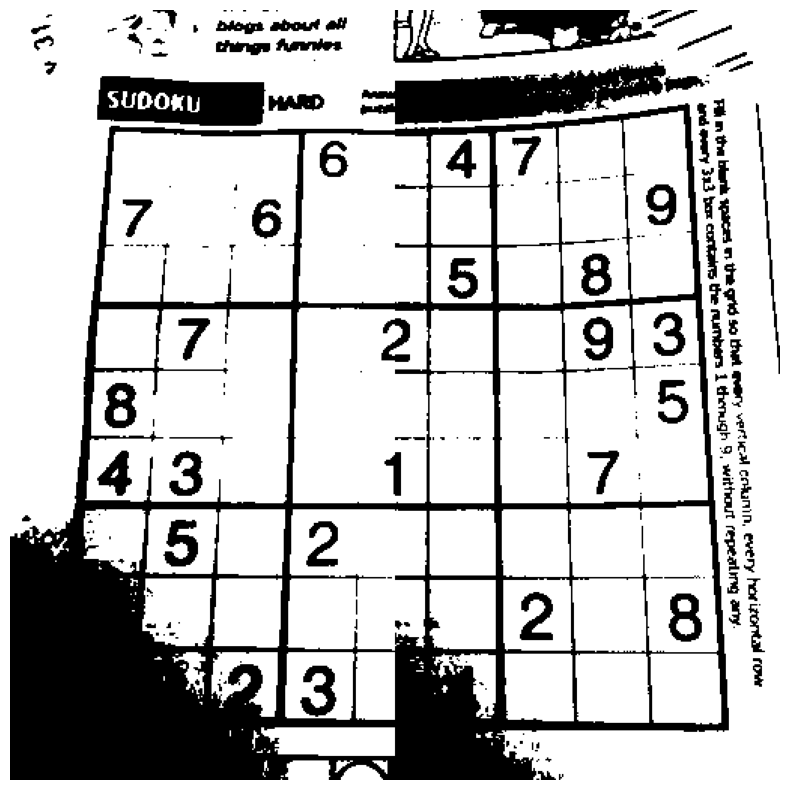

In [91]:
def adaptive_binarization(Image, N):
    h, w = Image.shape
    new_b_img = np.zeros_like(Image)
    
   
    for i in range(0, h, N):
        for j in range(0, w, N):
            
            
            block = Image[i:i + N, j:j + N]
            
            binaryimg = otsu(block)
            # collecting all the blocks
            new_b_img[i:i + N, j:j + N] = binaryimg
    
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(new_b_img, cmap="gray")
    
    return new_b_img
binarizedimage_2x2 = adaptive_binarization(sudoku, 256)



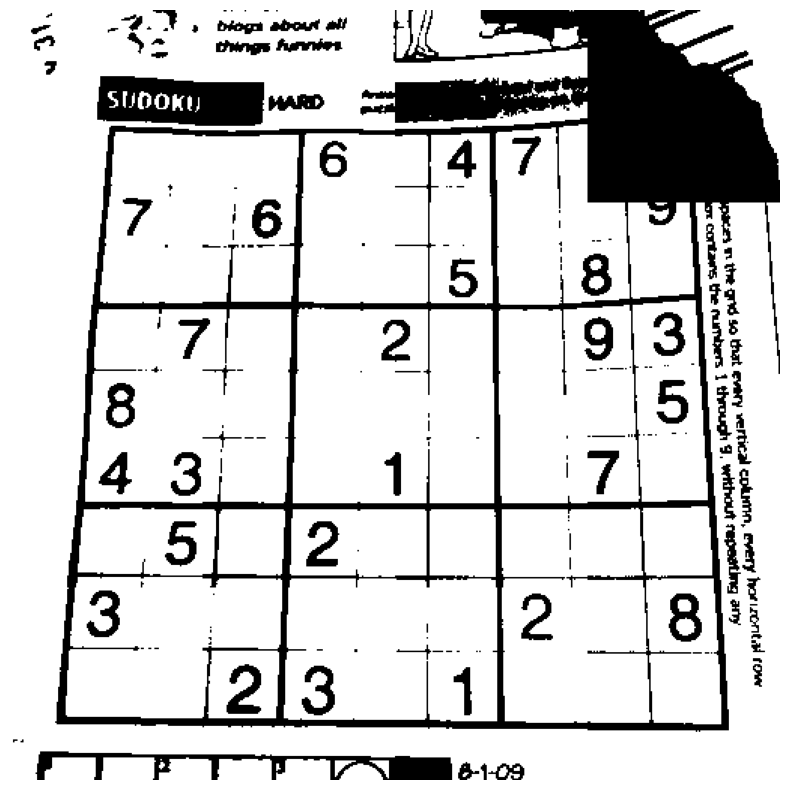

In [92]:
binarizedimage_4x4 = adaptive_binarization(sudoku, 128)

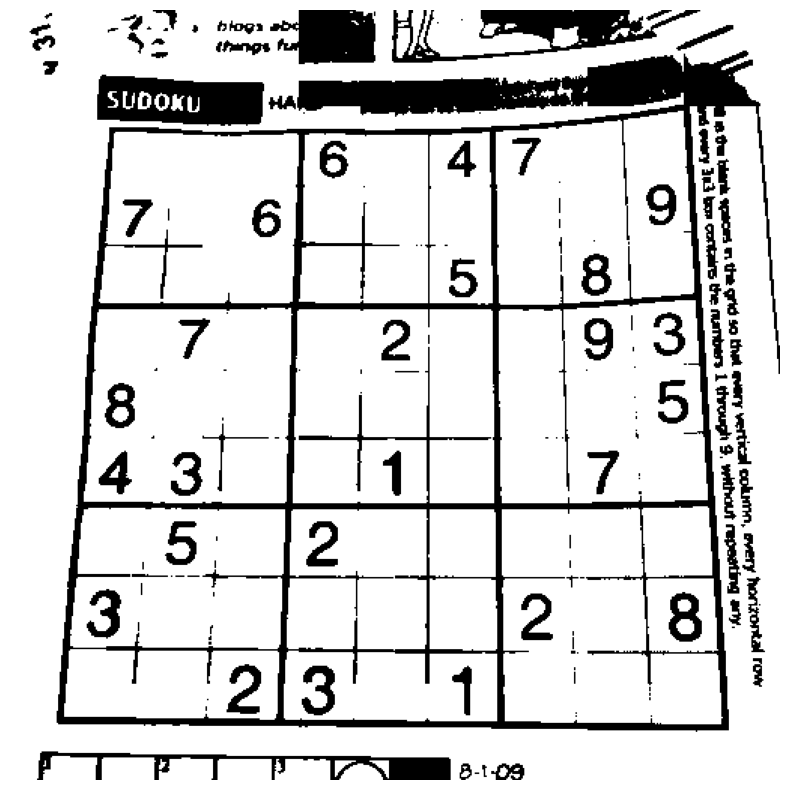

In [93]:
binarizedimage_8x8 = adaptive_binarization(sudoku, 64)

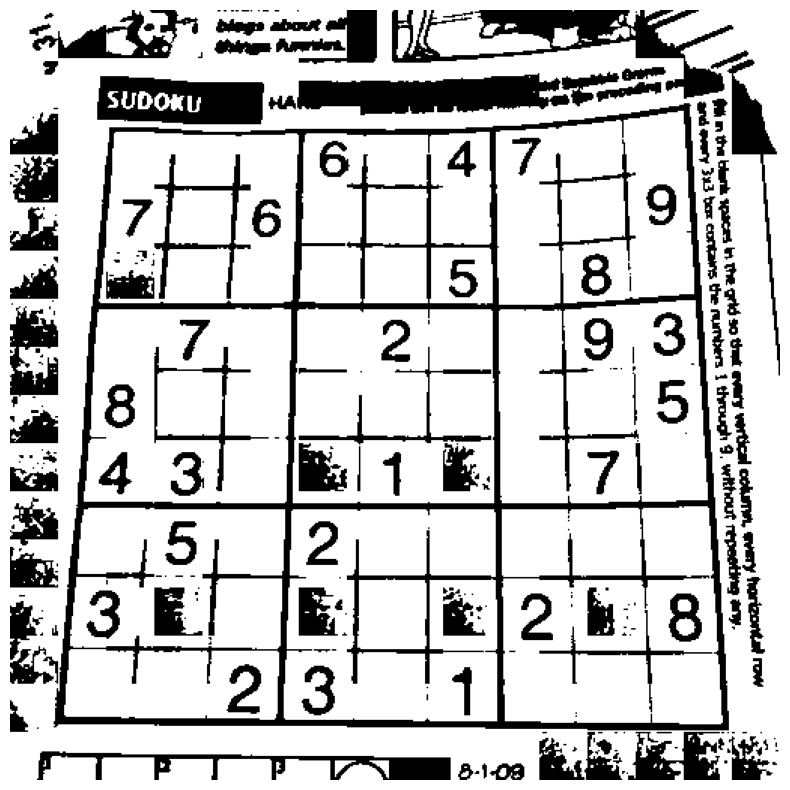

In [94]:
binarizedimage_16x16 = adaptive_binarization(sudoku, 32)

#### Question 4 

In [95]:
path = 'quote.png'
quote = Image.open(path)
quote = np.asarray(quote)
quote

array([[211, 212, 214, ..., 205, 205, 203],
       [212, 209, 211, ..., 205, 199, 202],
       [215, 213, 212, ..., 207, 202, 203],
       ...,
       [208, 210, 210, ..., 215, 216, 213],
       [208, 210, 210, ..., 214, 213, 213],
       [210, 211, 210, ..., 213, 213, 213]], dtype=uint8)

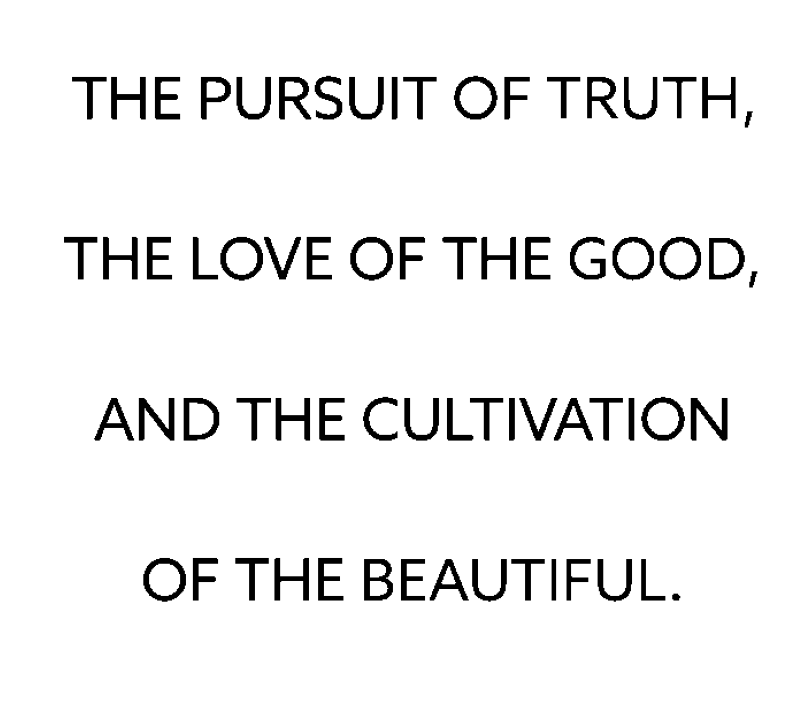

In [100]:
def binary_img(s):
    thr = within_class_variance(s.flatten(), 255)
    new_arr_quote = np.zeros(s.shape)
    #new_arr_sudoku
    new_arr_quote[s <= thr] = 0
    new_arr_quote[s > thr] = 255
    new_arr_quote
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    return plt.imshow(new_arr_quote, cmap="gray")
binary_img(quote)

In [103]:
def connected_components(quote):
    a,b = quote.shape
a,b

(array([2, 3, 4]), array([23,  4,  5]))

array([25,  7,  9])

In [104]:
len(np.arange(256))

256